# LINEAR REGRESSION

## Methods
## 1> Using Scikit Library
## 2> Using Gradient descent Algorithm
## 3> Using Normal Eqaution

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Method 1 : Using Scikit learn Library

### Loading Data from file

In [2]:
df = pd.read_csv('student_scores.csv')
x_test = pd.DataFrame(df['Hours']) # --> Independent Variable
y_test = pd.DataFrame(df['Scores'])# --> Dependent Variable 
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Model Training

In [3]:
model = LinearRegression().fit(x_test , y_test)
# Regular Eqaution of Line : Y = mX + c
m = model.coef_  # --> Coefficient of model means slope of line
c = model.intercept_ #--> intercept of model means Intersection with axis Y
y_train = (m*x_test) +c # --> y = mX + c

### Visualisation 

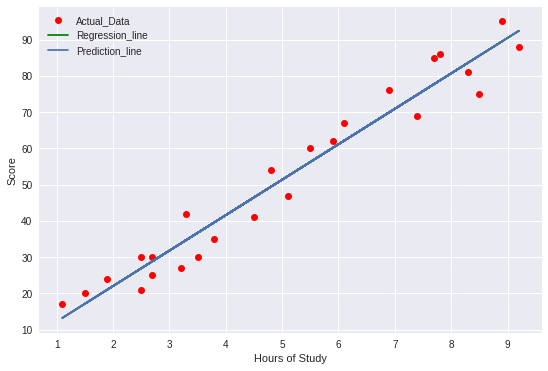

In [4]:
plt.figure(figsize = (9 , 6))
plt.style.use('seaborn')
plt.plot(x_test , y_test , 'ro' , label = "Actual_Data")
plt.plot(x_test , y_train , 'g-' , label = "Regression_line")
plt.plot(x_test , model.predict(x_test) , label = "Prediction_line")
plt.xlabel("Hours of Study")
plt.ylabel("Score")
plt.legend()
plt.show()

In [5]:
print("Accuracy of model is " , (model.score(x_test , y_test)) * 100)

Accuracy of model is  95.29481969048355


In [6]:
prediction = model.predict(pd.DataFrame([9.25]))
print("Predicted score on 9.25 hours study:",prediction[0][0])

Predicted score on 9.25 hours study: 92.90985477015731


# Methos 2 : Using Gradient descent Algorithm

##  With Gradient-Descent Algo ( From Scratch )  :

In [7]:
m = len(df['Hours'])
x_train = np.array(df['Hours']).reshape(m , 1)
y_train2 = np.array(df['Scores']).reshape(m , 1)

### Linear Regression Algorithm:
#### 1)initialize parameters such as a means theta1 and b means theta0
#### 2) for i = 0 to iterations:
            Apply Gradient decent
            compute gradients of cost wrt a and b
            compute cost function 
            compute cost just for checking whether it is strictly decreasing or not        
#### 3) now you have final parameters theta and b, so make your predict function, hx = theta*X + b

In [8]:
## a = theta1
## b = theta0
## hx = h(x)

def initialize_parameters(): #--> Initialising parameters by array of zeros 
    parameters = {}
    parameters['a'] = np.zeros((1,1)) # --> a means theta1
    parameters['b'] = np.zeros((1,1)) # --> b means theta0
    return parameters
def hx(para , x): # -->  Finding hypothesis means h(x)
    hx = (np.dot( x , para['a'])) + para['b'] # --> h(x) = aX + b      |     (theta0 + X * theta1)
    return hx
def derivatives(para , m , x , y): # --> Derivatives of theta0  and theta1
    deriv = {}
    h = hx(para , x)
    deriv['db'] = (np.sum(h - y)) / m # --> d(theta0)
    deriv['da'] = np.sum(np.dot(x.T , h-y)) / m # --> d(theta1)
    return deriv
def cost_function(para , m , x , y): # --> Cost Function to find total cost of function 
    h = hx(para , x)
    J = sum(np.square(h - y))*0.5/m
    return J
def parameter_updating(para , deriv , lr): # -->  Updating parameters by learning rate 
    para['a'] -= lr * deriv['da']
    para['b'] -= lr * deriv['db']
    return para

In [9]:
def Linear_Regression_model(para , x , y , m , lr , iterations):
    Jall = []
    for i in range(1 , iterations+1):
        der = derivatives(para , m , x_train , y_train2)
        para = parameter_updating(para , der , lr)
        J = cost_function(para , m , x_train , y_train2)
        Jall.append(J)
        #print("Iteration no {} cost is {}".format(i , J))
    return para , Jall

In [10]:
para = initialize_parameters()
para , Jall = Linear_Regression_model(para , x_train , y_train2 , m , 0.06 , 10000)

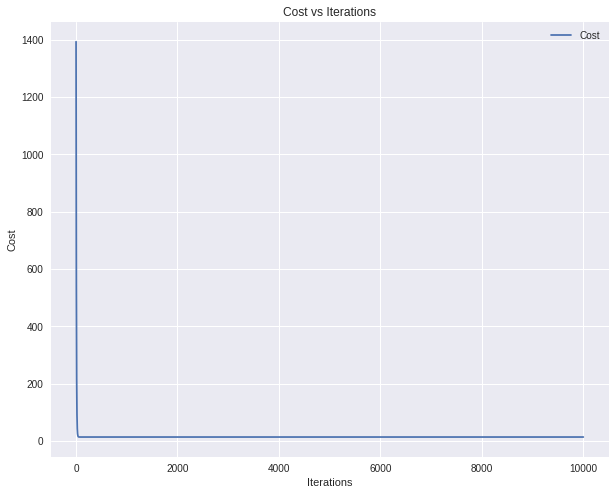

In [11]:
plt.figure(figsize = (10 ,8))
plt.style.use('seaborn')
plt.plot(list(range(1,len(Jall)+1)) , Jall , label = 'Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.legend()
plt.show()

In [12]:
print("Slope(Theta0) :" , para['a'][0][0])
print("intercept(Theta1) :" , para['b'][0][0])
predicted = hx(para , x_train) # --> Finding Predicted value of Scores form actual data of Hours to find R2 Value

# --> By r square method Finding the accuracy
r = (sum(np.square(predicted - np.mean(y_train2)))) / (sum(np.square(y_train2 - np.mean(y_train2)))) 
print("Accuracy of From Scratch Model is :" , r[0]*100)   

Slope(Theta0) : 9.775803390787473
intercept(Theta1) : 2.4836734053731737
Accuracy of From Scratch Model is : 95.29481969048356


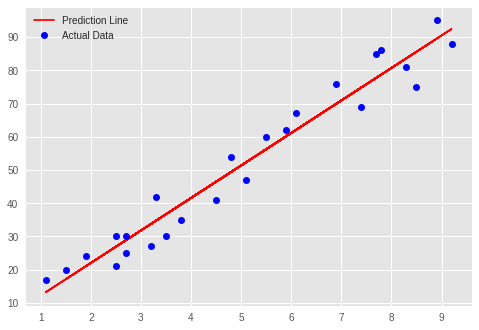

In [13]:
plt.style.use('ggplot')
plt.plot(x_train , predicted , 'r-' , label = 'Prediction Line')
plt.plot(x_train , y_train2 , 'bo' , label = 'Actual Data')
plt.legend()
plt.show()

In [14]:
Final_prediction = hx(para , 9.25)
print("Predicted score on 9.25 hours study:" , Final_prediction[0][0])

Predicted score on 9.25 hours study: 92.9098547701573


In [15]:
print('Minimum Cost' ,min(Jall)[0])

Minimum Cost 14.441365254622717


# Method 3 : Normal Eqaution

### First add column of values 1 to features matrix
### then convert dependant column to vector
### Find Theta by Normal Eqaution which minimize the cost Function
### Find Prediction line using Hypothesis (h(x) = theta0 + theta1 * x)
### Plot Prediction line and Actual Data 


## Eqaution :
### theta = ( ( Inverse ( X_Transpose * X) ) * X_Transpose) * Y

In [78]:
x_test1 = (df['Hours'])
x1 = pd.DataFrame(df['Hours'])
x0 = [1]*25 # --> For Computation 
x1.insert(loc = 0 , value = x0 , column = 'x0') # --> Adding Column at 0th loaction
x1.rename(columns = {'Hours' : 'x1'} , inplace = True) #--> for comfortable to understand
X1 = x1.to_numpy() # --> Converting to numpy array
X1.shape

(25, 2)

In [79]:
Y = pd.DataFrame(df['Scores'])
Y.rename(columns = {'Scores' : 'y'} , inplace = True)
y = Y.to_numpy()
y.shape

(25, 1)

## By Normal Eqation Solution of Theta to minimize Cost function

In [94]:
def theta(x , y):
    x_trans = x.transpose()
    temp = np.matmul(np.matmul(np.linalg.inv(np.matmul(x_trans,x)) , x_trans) , y)
    # step by step operations
    #temp = np.matmul(x_trans,x) ## Matrix Multiplication
    #temp = np.linalg.inv(temp) # ----> Inverse of Matrix
    #temp = np.matmul(temp , x_trans)
    #temp = np.matmul(temp , y)
    return temp
def hx(para , x): # -->  Finding hypothesis means h(x)
    hx = (np.dot( x , para[1][0])) + para[0][0] # --> h(x) = aX + b      |     (theta0 + X * theta1)
    return hx
pred = hx(theta(X1 , y) , x_test1) #--> passing original data for plotting prediction line

In [100]:
Final_prediction = hx(theta(X1 , y) , 9.25) # --> Pass any value 
print("Predicted score on 9.25 hours study:" , Final_prediction)

Predicted score on 9.25 hours study: 92.90985477015732


### Accuracy of Model using R-Sqaure_Method

In [102]:
# --> By r square method to Find the accuracy
r = (sum(np.square(pred - np.mean(y)))) / (sum(np.square(y - np.mean(y)))) 
print("Accuracy of From Scratch Model is :" , r[0]*100)  

Accuracy of From Scratch Model is : 95.2948196904835


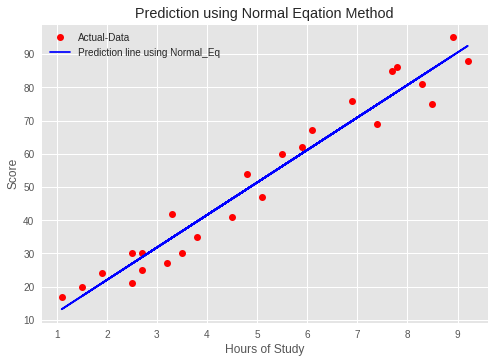

In [101]:
plt.plot(x_test1 , y , 'ro' , label = 'Actual-Data')
plt.plot(x_test1 , pred , 'b-' , label = "Prediction line using Normal_Eq")
plt.legend()
plt.title('Prediction using Normal Eqation Method')
plt.xlabel('Hours of Study')
plt.ylabel('Score')
plt.show()